### Model loading

In [2]:
from keras.models import load_model

C:\Users\Ros\Anaconda3\envs\face\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = load_model('cats_and_dogs_small_dataaug.h5')


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### IMAGE PREPROCESSING

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#img_keras = image.load_img('cat.jpg',target_size=(150,150))
img_keras = image.load_img('test_img.jpg',target_size=(150,150))
img_keras_tensor = image.img_to_array(img_keras)
img_keras_tensor = np.expand_dims(img_keras_tensor,axis=0)
#img_keras_tensor.shape
img_keras_tensor /=255.

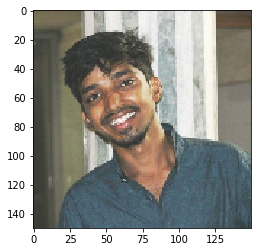

In [7]:
plt.imshow(img_keras_tensor[0])

####  Instantiating a model from an input tensor and a list of output sensors

In [8]:
from keras import models

In [9]:
#extracts the output of the layers(8 layers)
layer_outputs = [layer.output for layer in model.layers[:8]]

#creats a model that will return these outputs, given the model input
activation_model = models.Model(inputs = model.input,outputs = layer_outputs)

#### running the model in predict model

In [10]:
activations = activation_model.predict(img_keras_tensor)

In [12]:
#first layer activation 
first_layer_activation = activations[0]

In [13]:
first_layer_activation

array([[[[0.        , 0.        , 0.01165567, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.00799861, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.00944989, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.00602239, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.00814304, ..., 0.        ,
          0.        , 0.00454054],
         [0.        , 0.        , 0.00491804, ..., 0.        ,
          0.        , 0.00978843]],

        [[0.00505927, 0.        , 0.01309215, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.01352932, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.01044634, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.00591086, 0.        , 0.00610613, ..., 0.        ,
          0.        , 0.0

#### Visuvalizing the channel output

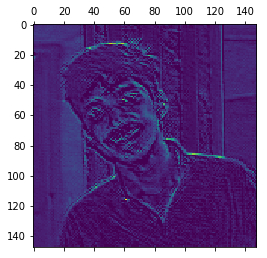

In [14]:
#channel fourth in first layer
plt.matshow(first_layer_activation[0,:,:,4], cmap ='viridis')

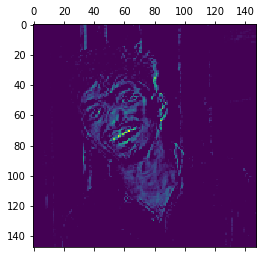

In [16]:
#channel 7th in first layer
plt.matshow(first_layer_activation[0,:,:,7], cmap ='viridis')

In [20]:
len(activations)

8

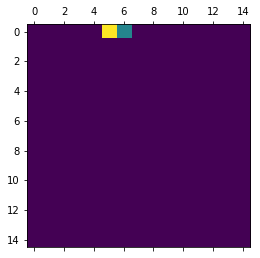

In [30]:
plt.matshow(activations[6][0,:,:,127], cmap ='viridis')

### Visuavalizing every channel in every intermediate activation

In [31]:
#Names of the layers
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

In [32]:
images_per_row = 16

C:\Users\Ros\Anaconda3\envs\face\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


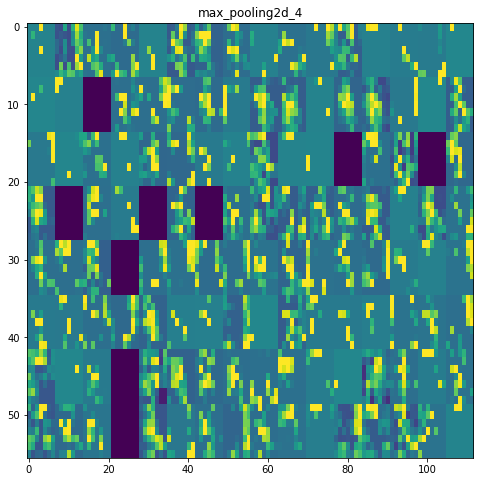

In [33]:
for layer_name, layer_activation in zip(layer_names, activations): #displays the features maps
    n_features = layer_activation.shape[-1] #number of features in the feature map
    #print(n_features)
    size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
    #print(size)
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols,images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *=64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
    #print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(8,8))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

In [35]:
layer_names

['conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

In [38]:
layer_names[0]


'conv2d_1'

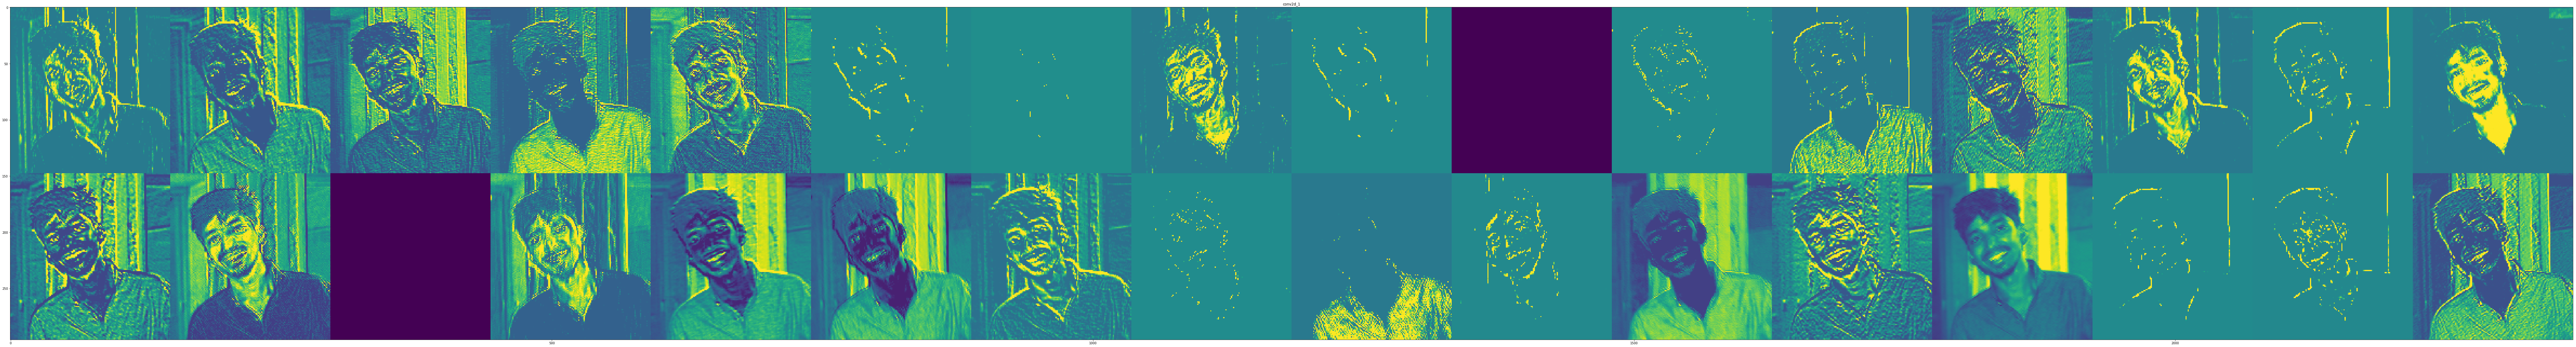

In [46]:
images_per_row = 16
layer_name = layer_names[0]
layer_activation = activations[0]
n_features = layer_activation.shape[-1] #number of features in the feature map
#print(n_features)
size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
#print(size)
n_cols = n_features//images_per_row
display_grid = np.zeros((size*n_cols,images_per_row*size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *=64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
#print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(150,20))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

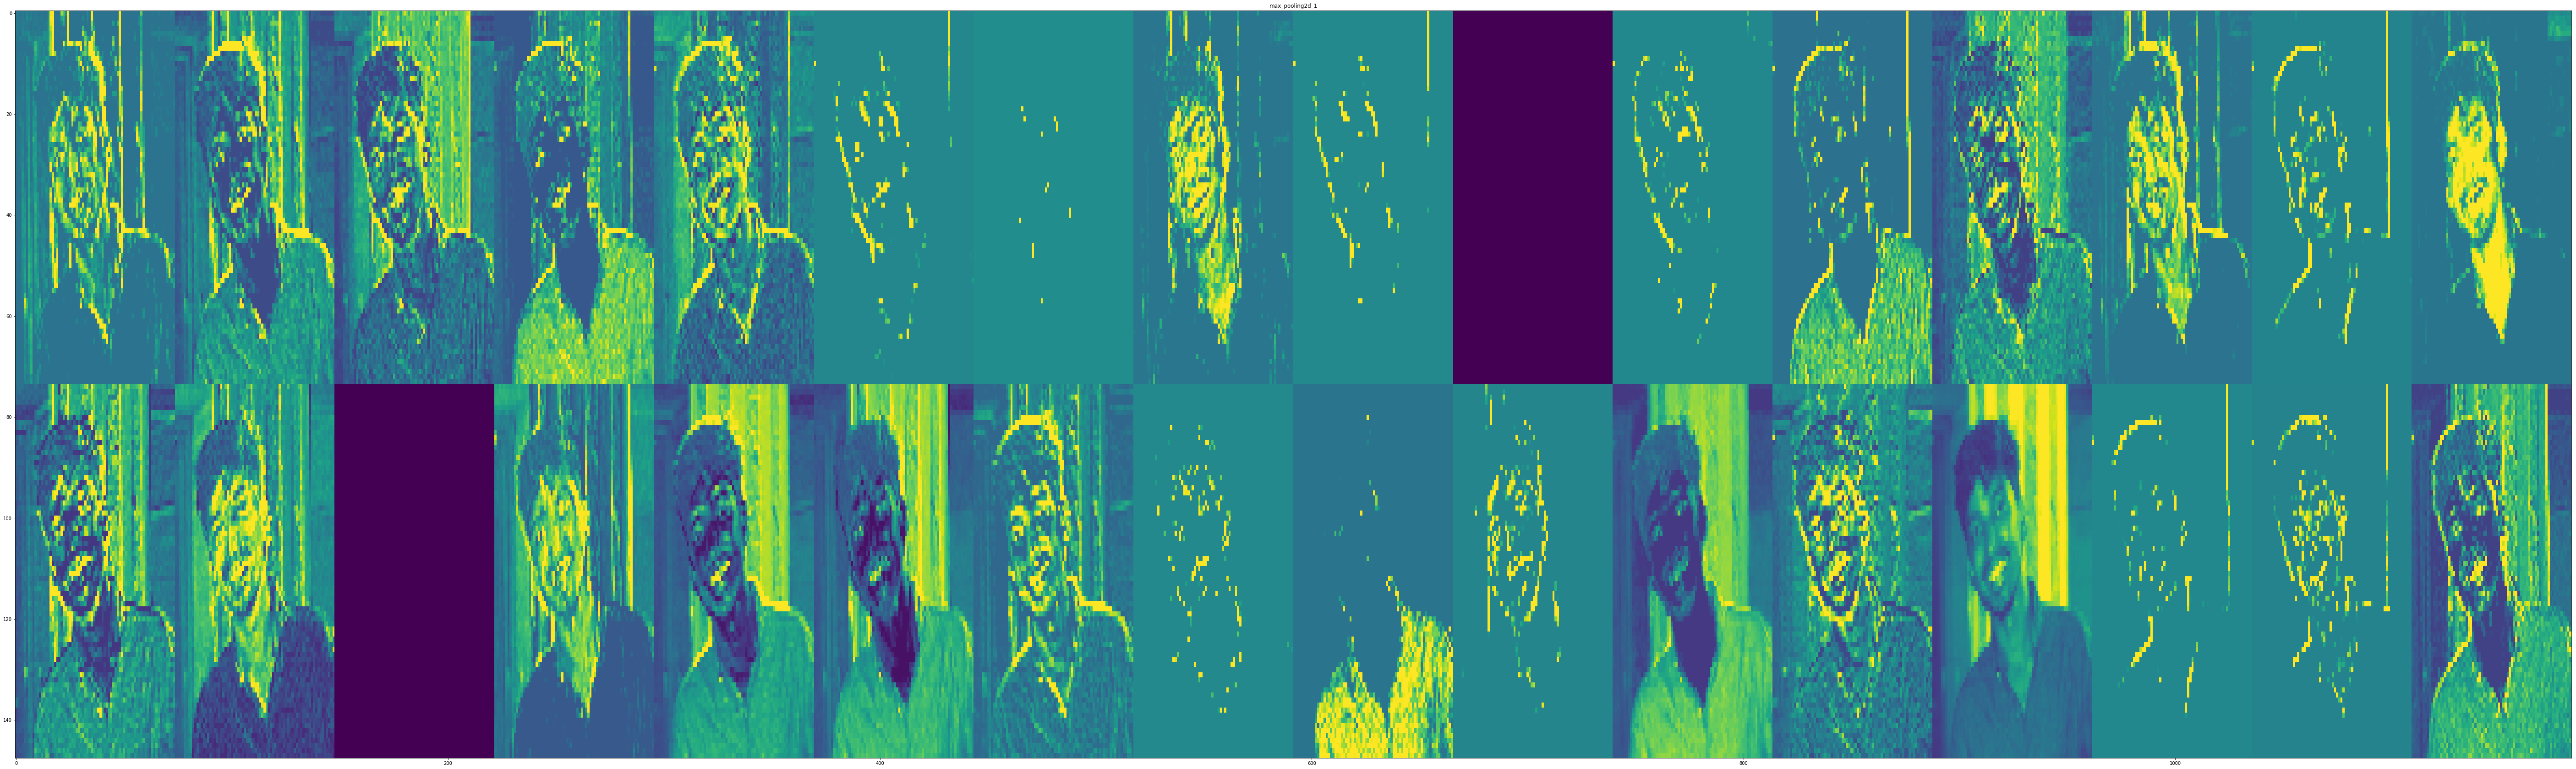

In [60]:
images_per_row = 16
layer_name = layer_names[1]
layer_activation = activations[1]
n_features = layer_activation.shape[-1] #number of features in the feature map
#print(n_features)
size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
#print(size)
n_cols = n_features//images_per_row
display_grid = np.zeros((size*n_cols,images_per_row*size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *=64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
#print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(100,30))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

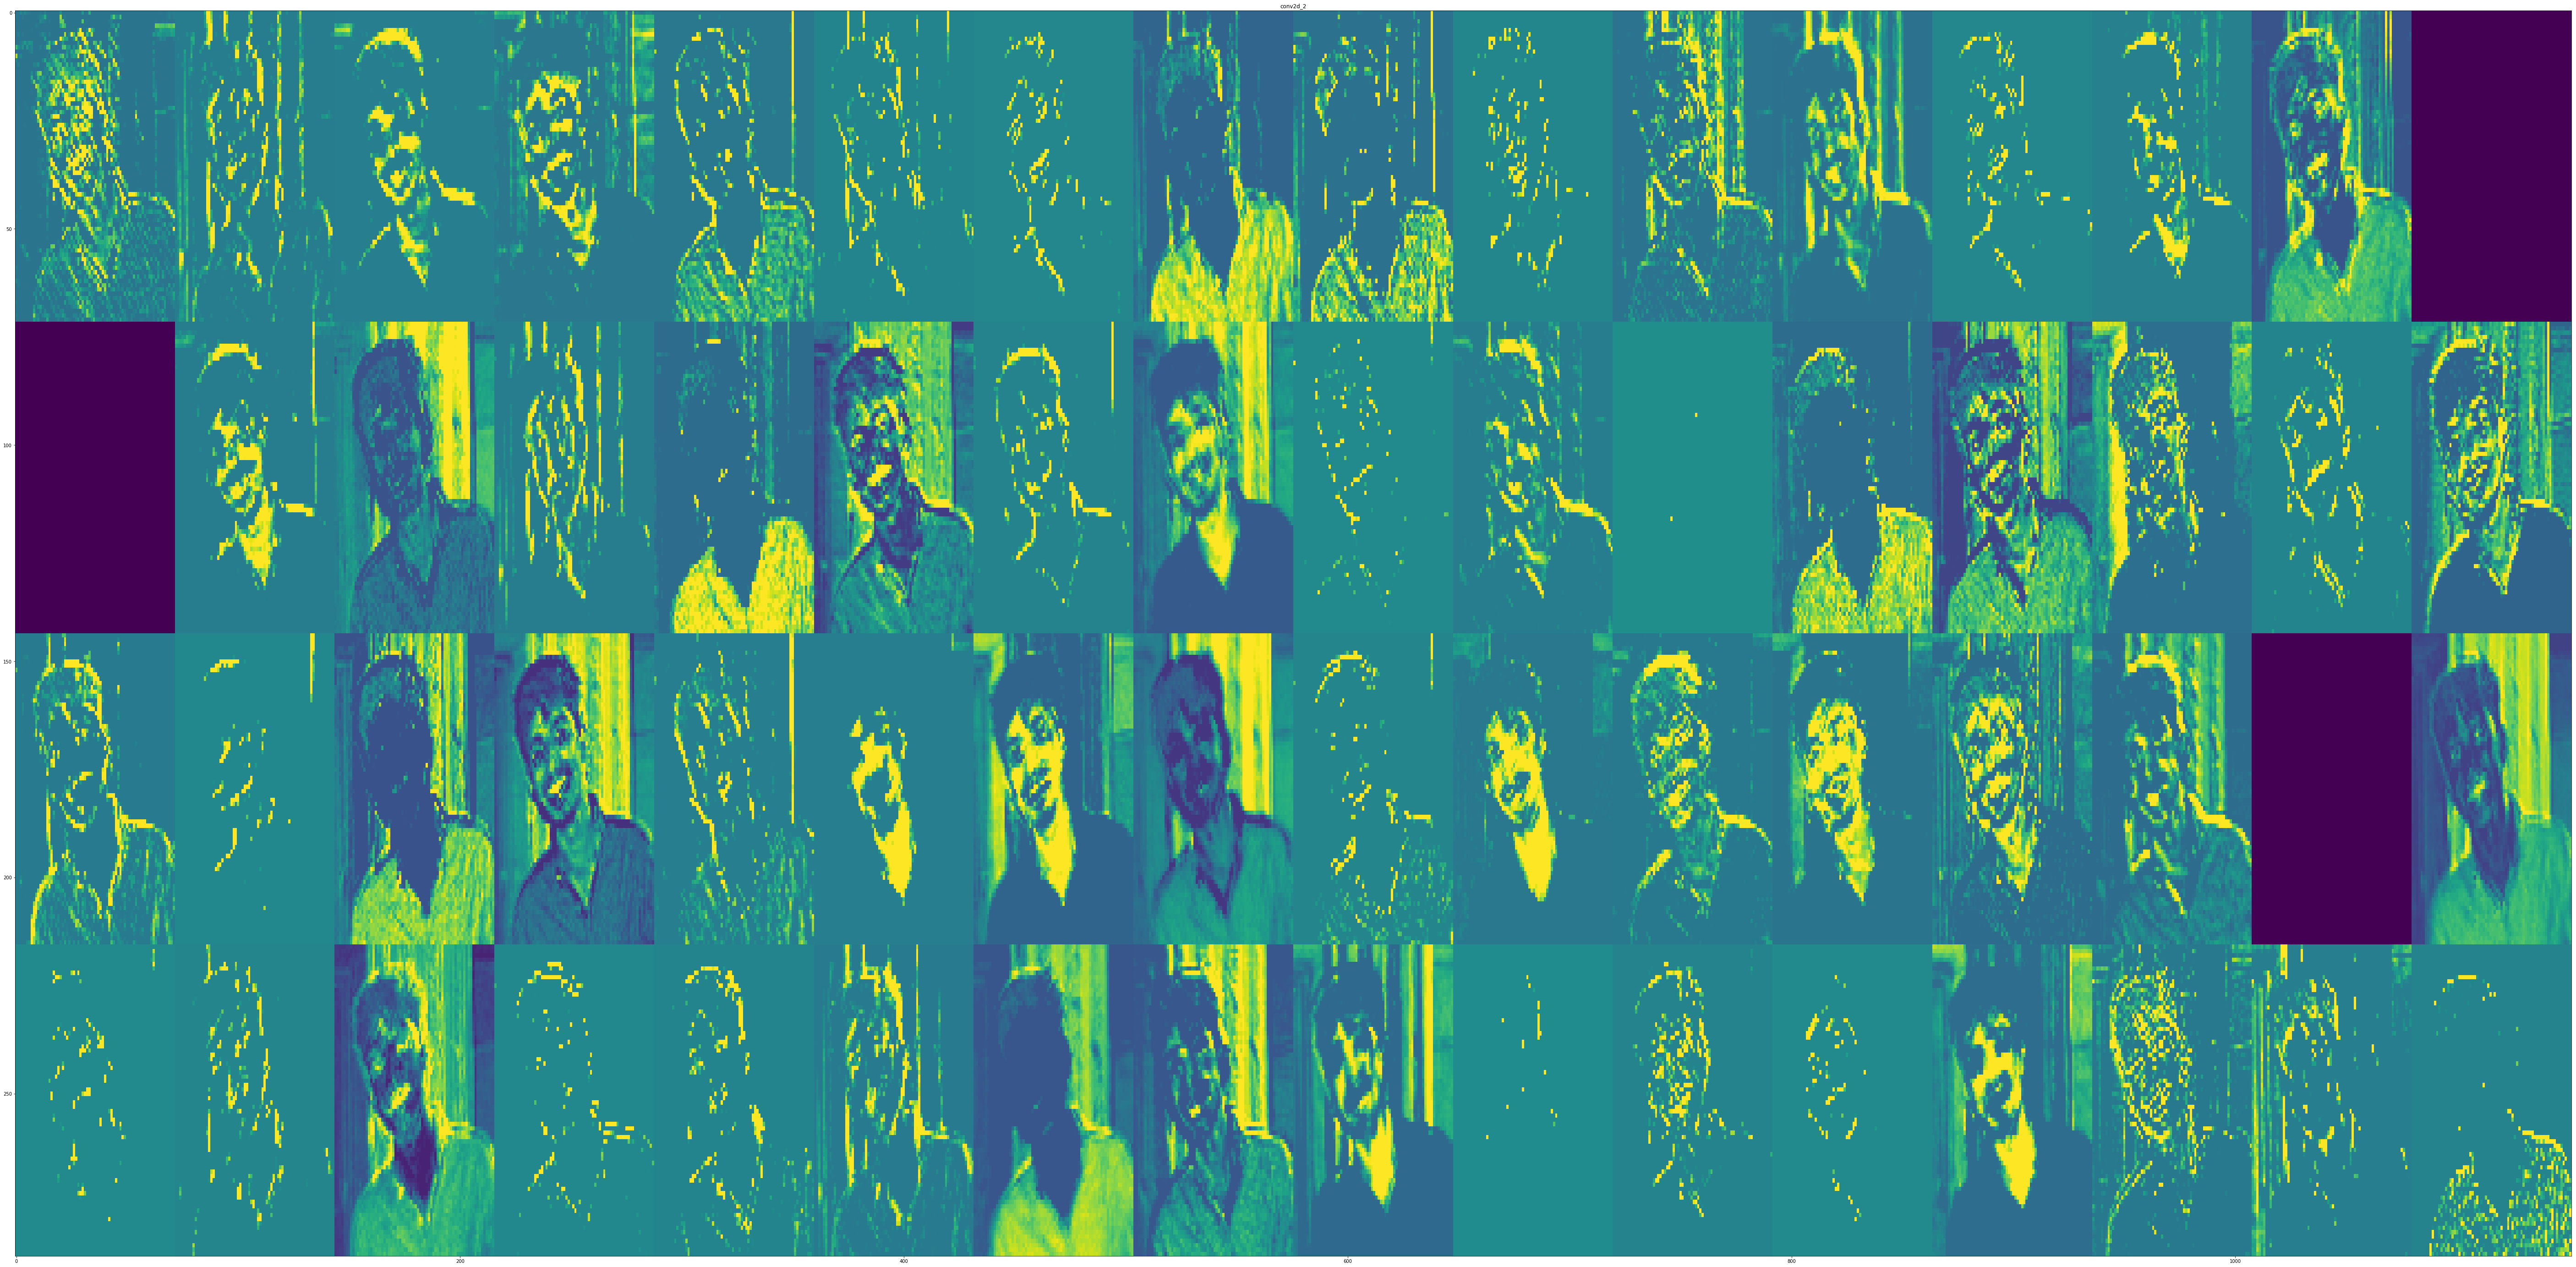

In [64]:
images_per_row = 16
layer_name = layer_names[2]
layer_activation = activations[2]
n_features = layer_activation.shape[-1] #number of features in the feature map
#print(n_features)
size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
#print(size)
n_cols = n_features//images_per_row
display_grid = np.zeros((size*n_cols,images_per_row*size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *=64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
#print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(100,50))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')
plt.savefig('mine.jpg')

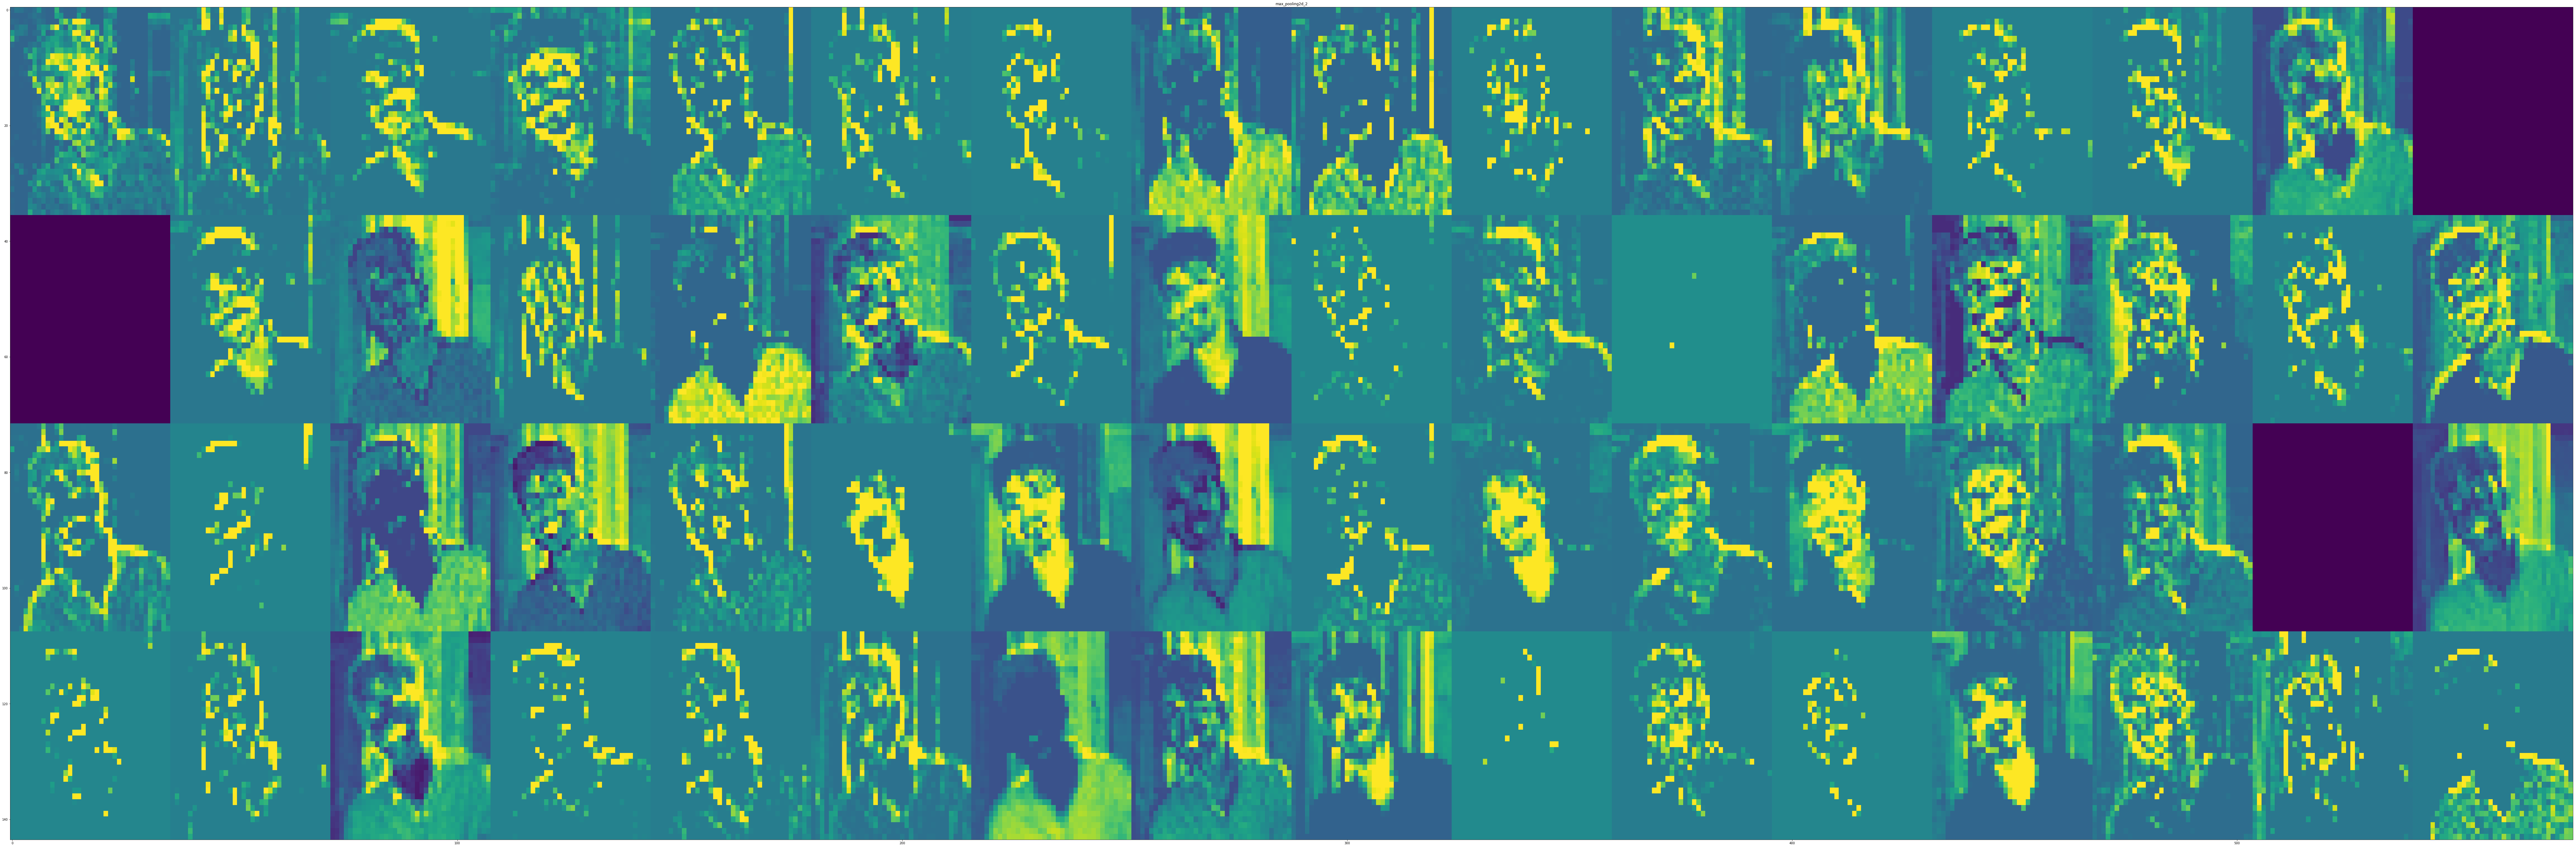

In [62]:
images_per_row = 16
layer_name = layer_names[3]
layer_activation = activations[3]
n_features = layer_activation.shape[-1] #number of features in the feature map
#print(n_features)
size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
#print(size)
n_cols = n_features//images_per_row
display_grid = np.zeros((size*n_cols,images_per_row*size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *=64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
#print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(150,50))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

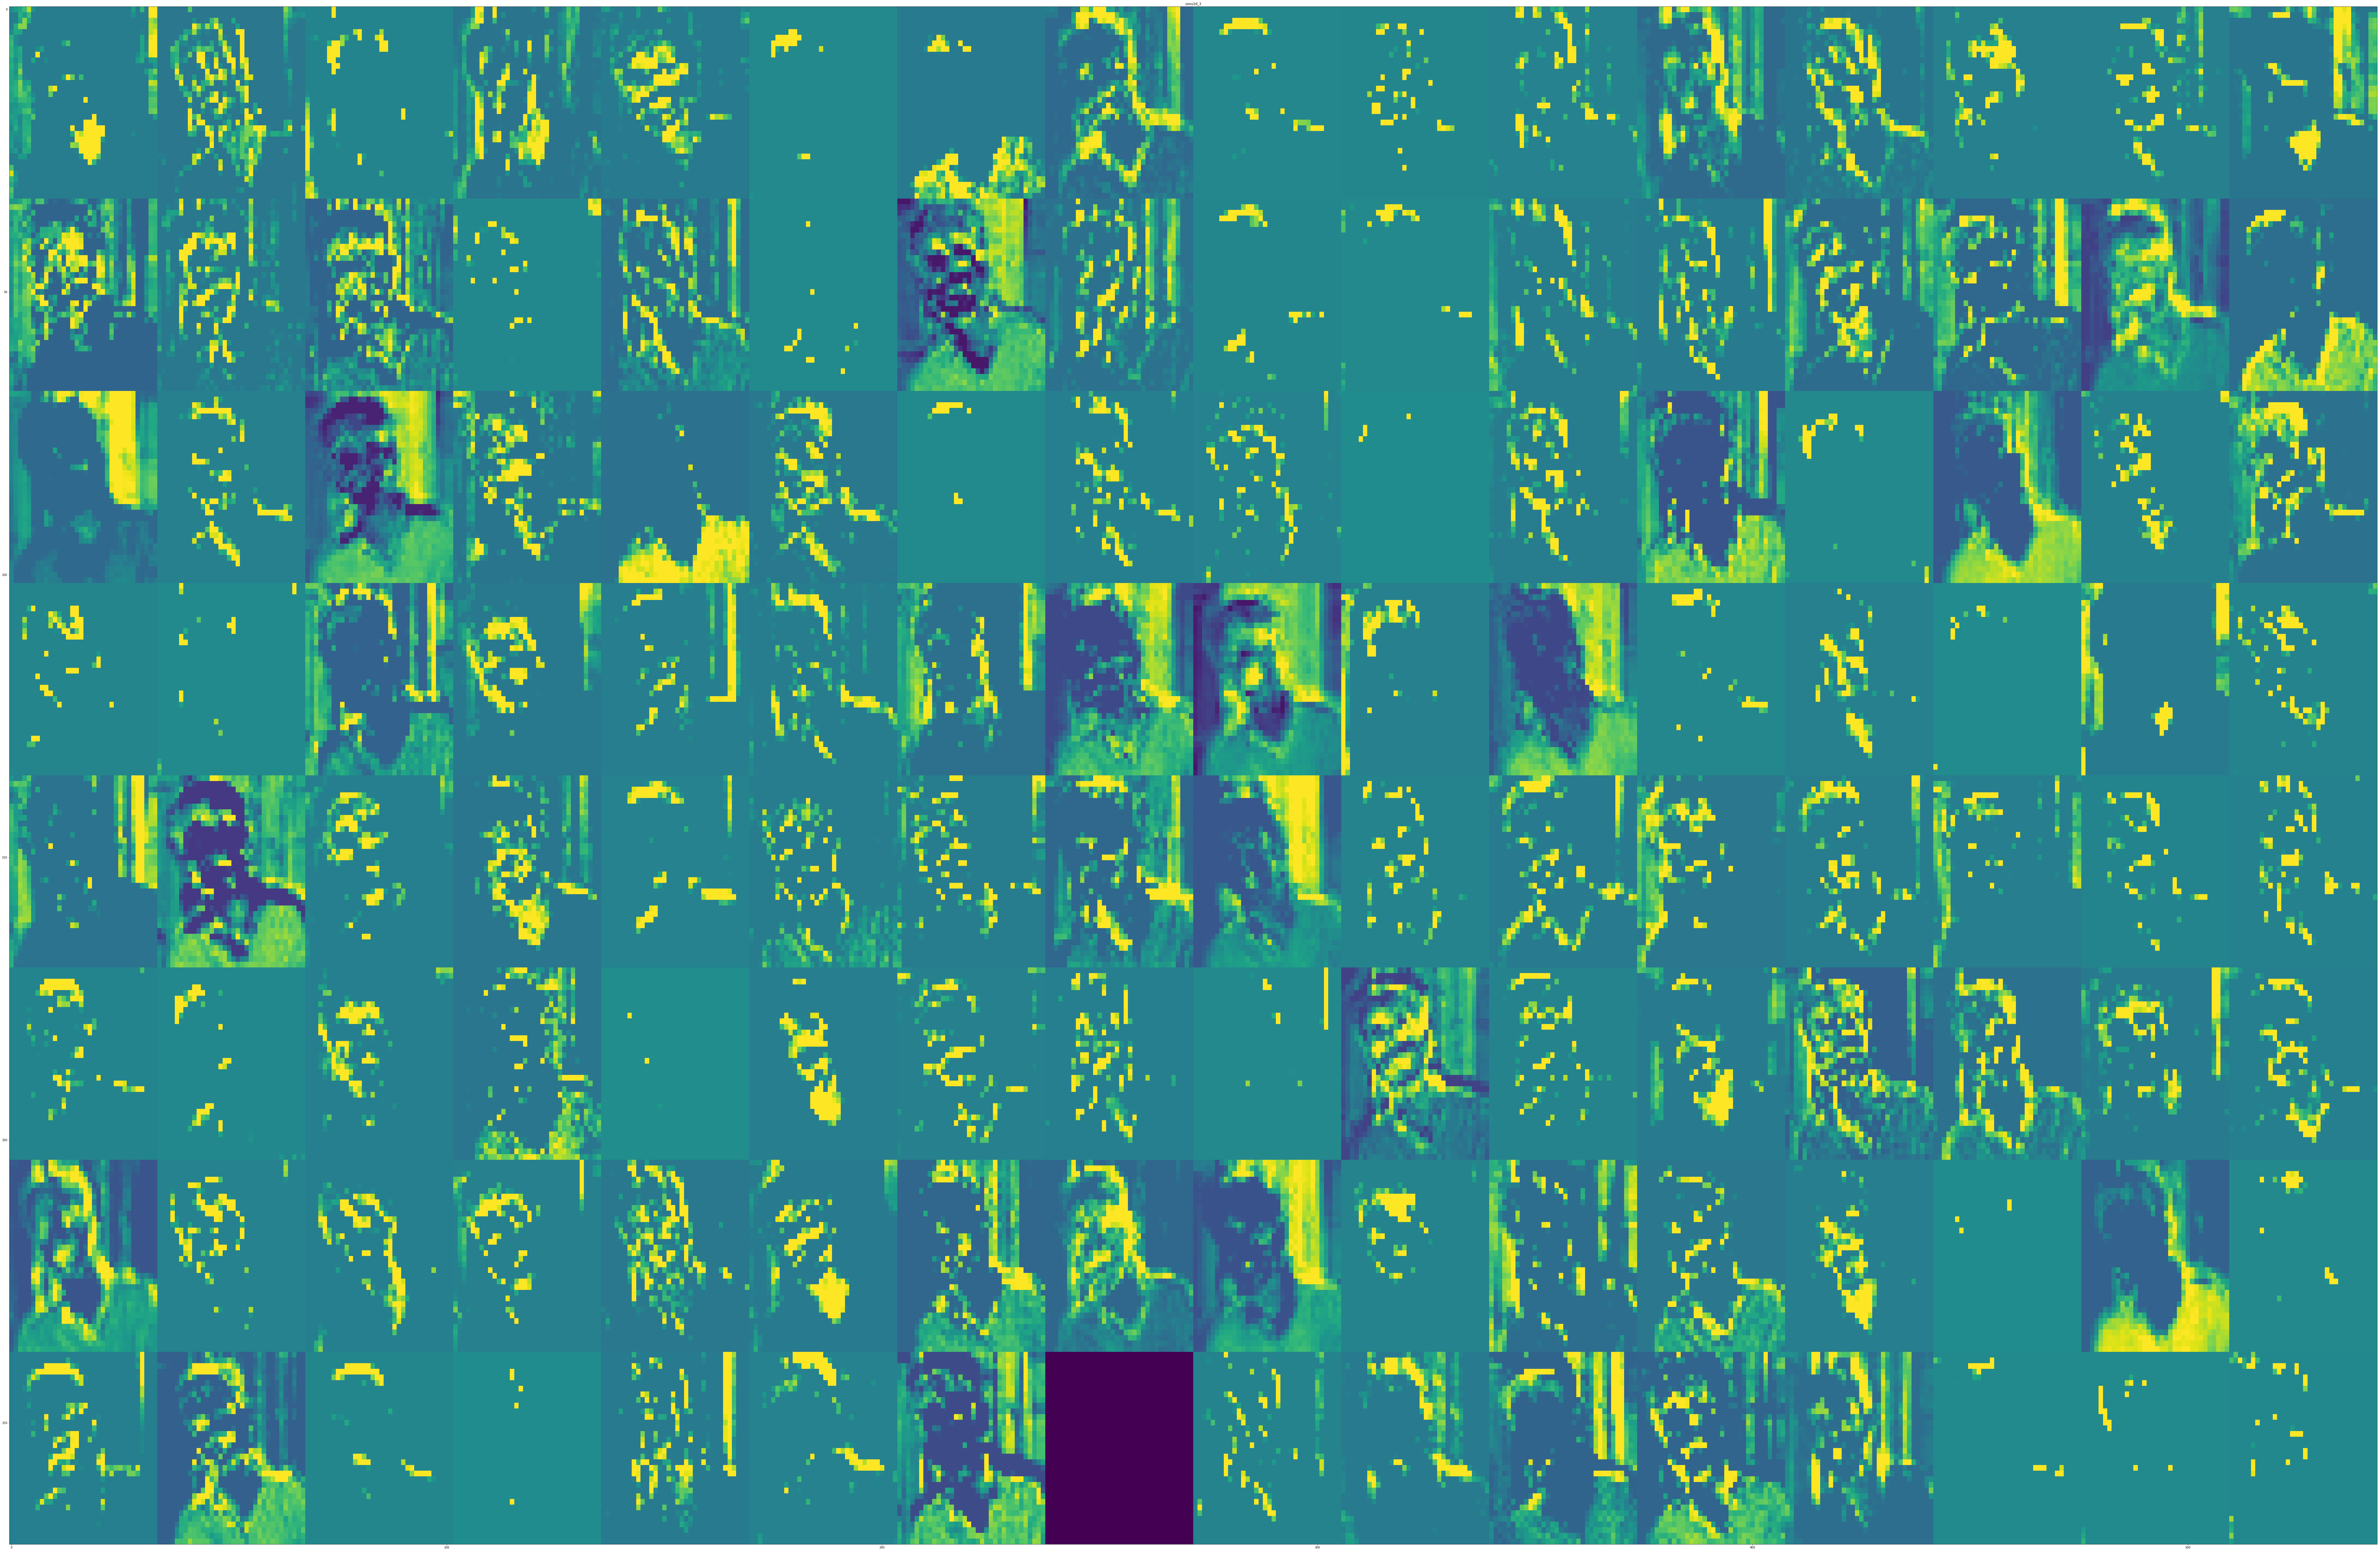

In [57]:
images_per_row = 16
layer_name = layer_names[4]
layer_activation = activations[4]
n_features = layer_activation.shape[-1] #number of features in the feature map
#print(n_features)
size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
#print(size)
n_cols = n_features//images_per_row
display_grid = np.zeros((size*n_cols,images_per_row*size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *=64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
#print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(150,100))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

In [56]:
images_per_row = 16
layer_name = layer_names[7]
layer_activation = activations[7]
n_features = layer_activation.shape[-1] #number of features in the feature map
#print(n_features)
size = layer_activation.shape[1]  #the feature map has shape (I,size,size, n_features)
#print(size)
n_cols = n_features//images_per_row
display_grid = np.zeros((size*n_cols,images_per_row*size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *=64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size : (col + 1)*size, row*size : (row + 1)*size] = channel_image
#print(display_grid.shape)
            
scale = 1. /size
#print(scale)
#print(scale*display_grid.shape[0],scale*display_grid.shape[0])
#plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid[0]))
plt.figure(figsize=(250,250))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap = 'viridis')